In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [12]:
# 导入数据
# data = pd.read_csv('../data/MSFT.csv', index_col='Date', parse_dates=['Date'])
data = pd.read_csv('../data/BTC.csv', index_col='Date', parse_dates=['Date'])
used_features = ["High", "Low", "Open", "Volume"]
X = data[used_features]
y = data["Close"]
data

,Open,High,Low,Close,Volume
Date,,,,,
2015-11-15,333.050995,334.661987,317.489990,320.165985,44213100
2015-11-16,319.734985,331.626007,315.904999,330.751007,47980100
2015-11-17,330.362000,338.350006,329.614014,335.093994,51001600
2015-11-18,334.592987,336.531006,330.640015,334.589996,43783800
2015-11-19,334.678986,335.334015,325.273010,326.148987,45011100
...,...,...,...,...,...
2020-03-06,9078.308594,9167.695313,9032.079102,9122.545898,40826885650
2020-03-07,9121.600586,9163.220703,8890.744141,8909.954102,36216930369
2020-03-08,8908.206055,8914.343750,8105.252930,8108.116211,39973102120


In [27]:
# 从数据集中取30%作为测试集，其他作为训练集
# X_train, X_test, y_train, y_test = train_test_split(
#     X,
#     y,
#     test_size=0.3,
# )
# y_train
X_train = X[:'2019-10-07']
X_test = X['2019-10-07':]
y_train = y[:'2019-10-07']
y_test = y['2019-10-07':]
X_test

,High,Low,Open,Volume
Date,,,,
2019-10-07,8308.450195,7905.766113,7989.120605,18009742607
2019-10-08,8332.714844,8185.763184,8246.849609,15592264032
2019-10-09,8627.706055,8169.298828,8229.840820,19384942333
2019-10-10,8625.272461,8471.933594,8585.280273,17618660671
2019-10-11,8721.780273,8316.181641,8585.262695,19604381101
...,...,...,...,...
2020-03-06,9167.695313,9032.079102,9078.308594,40826885650
2020-03-07,9163.220703,8890.744141,9121.600586,36216930369
2020-03-08,8914.343750,8105.252930,8908.206055,39973102120


In [14]:
# 创建线性回归模型
regr = linear_model.LinearRegression()

In [15]:
# 用训练集训练模型
regr.fit(X_train, y_train)
print("系数：",regr.coef_)
print("截距：",regr.intercept_)

系数： [ 8.95100410e-01  6.26478041e-01 -5.26570799e-01 -1.74698692e-10]
截距： 1.9311502852297053


In [28]:
# 用训练得出的模型进行预测
diabetes_y_pred = regr.predict(X_test)
print(diabetes_y_pred)
print(len(diabetes_y_pred))

[ 8181.63330092  8243.47437767  8505.5003298   8506.0605847
  8494.53194167  8361.21814336  8377.05048525  8317.68263178
  8244.77396738  8036.1369737   8055.59369218  7968.7113573
  8012.74162895  8181.01915859  8229.30255718  8143.07040415
  7668.80552951  7452.73342782  8518.37789974  9827.47448838
  9565.4392518   9535.16039484  9428.99509025  9165.28072539
  9206.70616231  9180.06588892  9310.74420901  9210.74117363
  9400.39753155  9305.34389441  9343.95466866  9224.06769934
  8916.53842062  8827.84503809  9023.64069072  8808.67919445
  8751.99509781  8757.54947209  8705.18203876  8544.52798785
  8527.30786163  8634.68535684  8412.12018242  8225.92227528
  8070.08726036  7791.92610013  7206.69349378  7298.08894009
  7135.82563908  6984.94451789  7235.24862174  7384.99259692
  7618.96840911  7705.66461931  7633.22077441  7356.89097502
  7311.94561773  7312.41137964  7384.87241958  7641.56073699
  7461.8754265   7533.52355001  7540.27092142  7450.5734508
  7288.3615688   7230.81004

In [29]:
# 以 预测准确率=（预测正确样本数）/（总测试样本数）* 100% 对预测准确率进行计算，设定 ErrorTolerance = 5%
def accuracy(predict, true):
    sizeofall = len(true)
    sizeofright = 0
    for i in range(0, sizeofall):
        est = abs(predict[i] - true[i]) / true[i]
        if est < 0.05:
            sizeofright = sizeofright + 1

    return sizeofright/sizeofall

In [30]:
# 将预测准确率打印出来
predict = np.array(diabetes_y_pred)
true = np.array(y_test)
Ac = accuracy(predict, true)
print("Accuracy=", Ac*100, '%')

Accuracy= 99.35897435897436 %


In [31]:
# 打印MAPE
MAPE = metrics.mean_absolute_percentage_error(true, predict)
print("MAPE=", MAPE*100, '%')

MAPE= 0.7975706705413264 %


In [32]:
# 以 R-Squared 对预测准确率进行计算，将其打印出来
print("R-Squared Accuracy=", (regr.score(X_test, y_test)) * 100, '%')

R-Squared Accuracy= 98.97414382539888 %


In [33]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.figure(figsize=(25, 6))
    plt.plot(test, color='red',label='Real BTC Stock Price')
    plt.plot(predicted, color='blue',label='Predicted BTC Price')
    plt.title('BTC Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('BTC Price')
    plt.legend()
    plt.show()

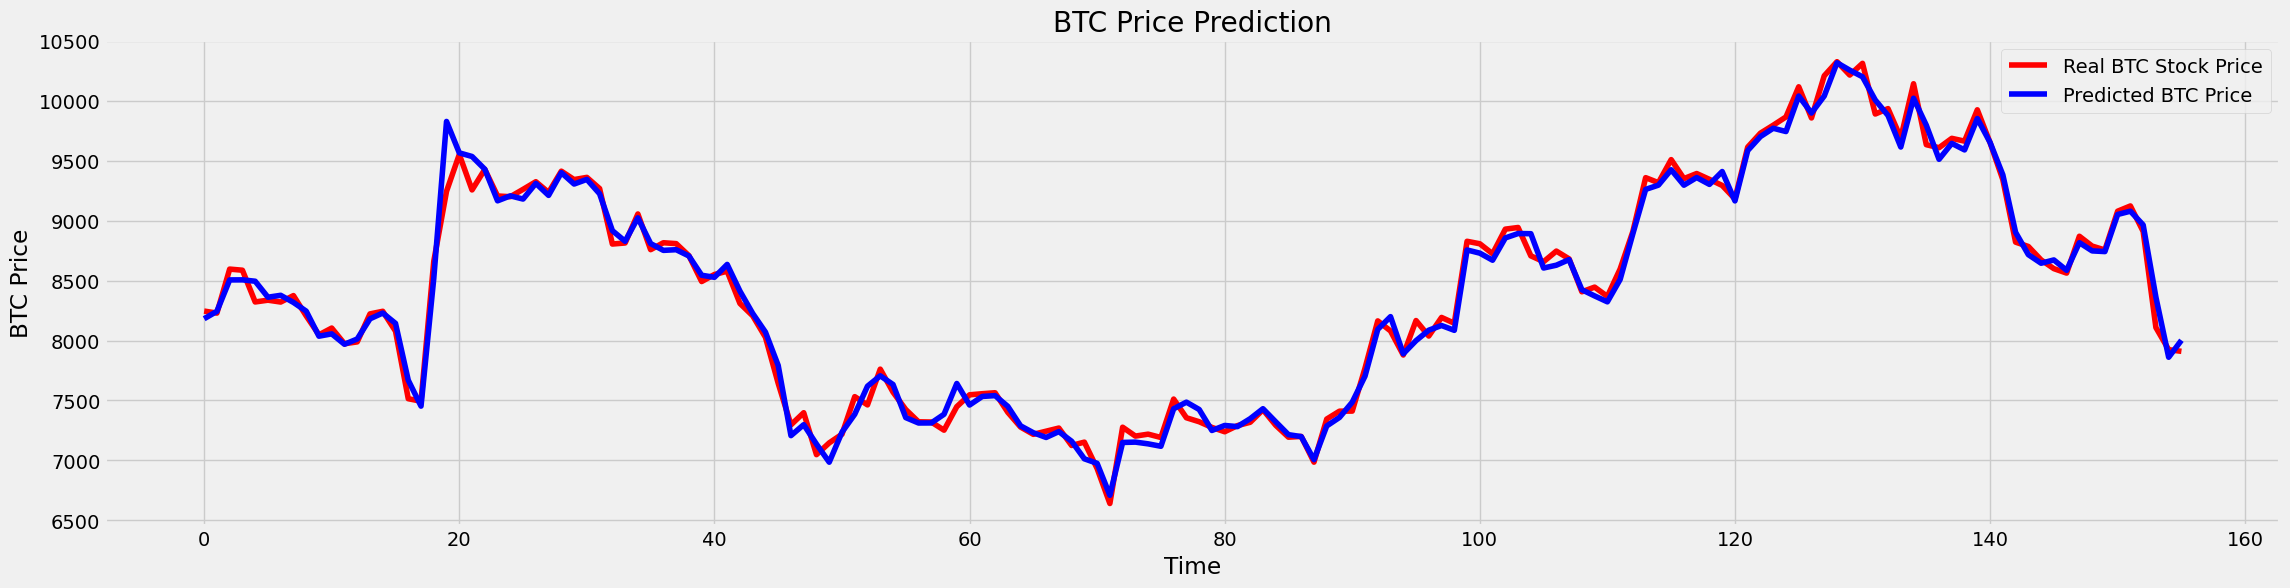

In [34]:
plot_predictions(true,predict)

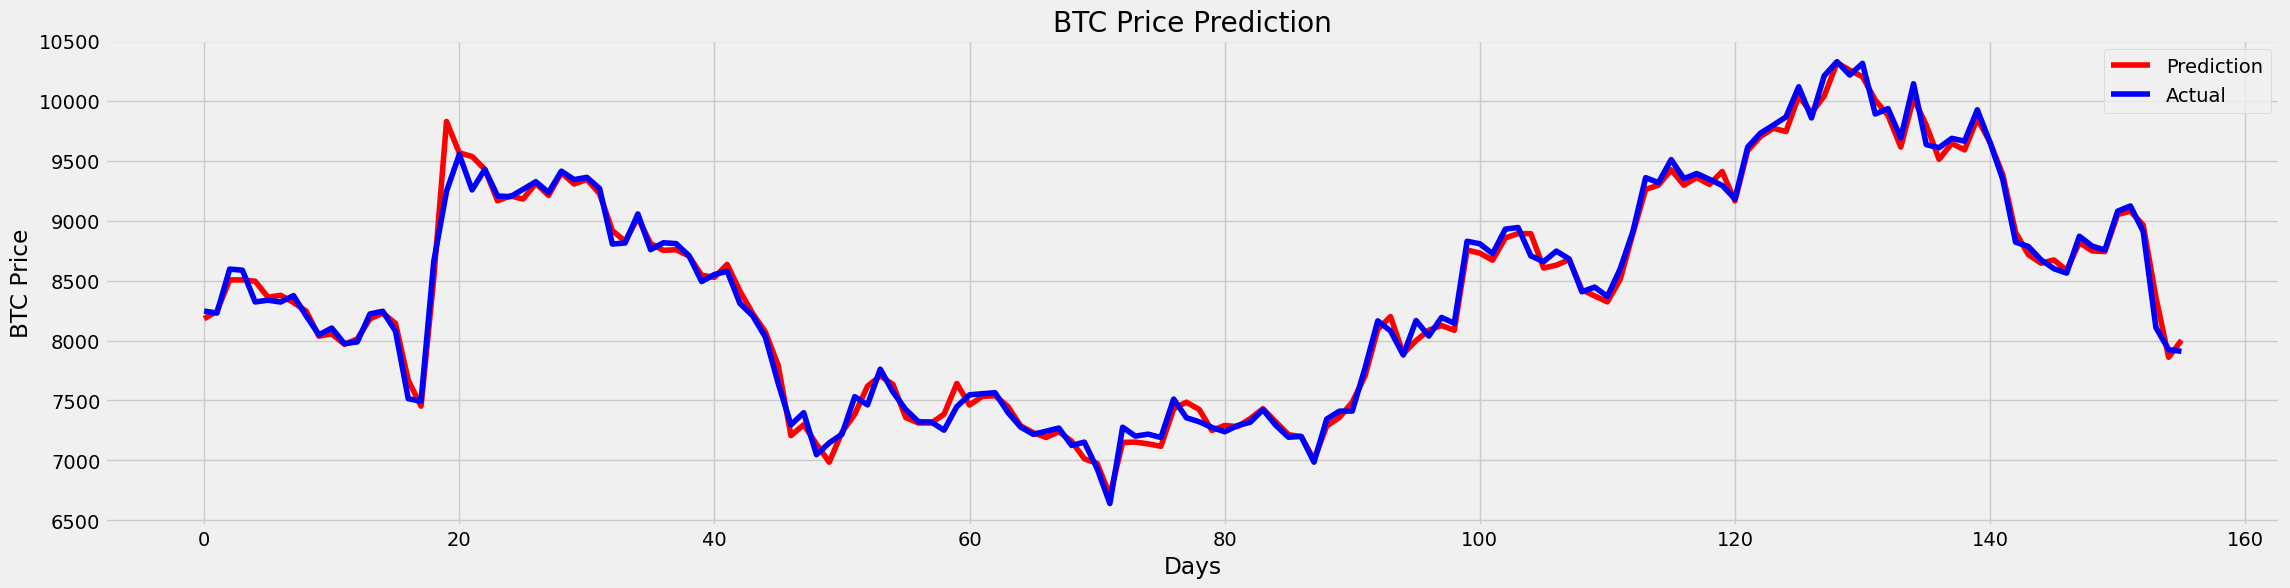

In [23]:
# plt.figure(figsize=(20,10))
# plt.plot(diabetes_y_pred,color = 'blue')
# plt.plot(np.array(y_test),color = 'red')

def plot_result(normalized_value_p, normalized_value_y_test):
    newp = normalized_value_p
    newy_test = normalized_value_y_test
    plt.figure(figsize=(25, 6))
    plt.plot(newp, color='red', label='Prediction')
    plt.plot(newy_test,color='blue', label='Actual')
    plt.legend(loc='best')
    plt.title('BTC Price Prediction')
    plt.xlabel('Days')
    plt.ylabel('BTC Price')
    plt.show()

plot_result(diabetes_y_pred, np.array(y_test))